# В предоставленном датасете проанализировать несколько характеристик и построить набор визуализаций.

In [29]:
import pandas as pd
import numpy as np

DATA_DIR = 'data'

# Загружаем данные в DataFrame ы
dfs = {}
years = np.arange(1880, 2011)
for year in years:
    file_path = DATA_DIR + '/' + str(year) + '.txt'
    dfs[year] = pd.read_csv(file_path, header=None, names=['name', 'sex', 'number'])
dfs = pd.Series(dfs)

## Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

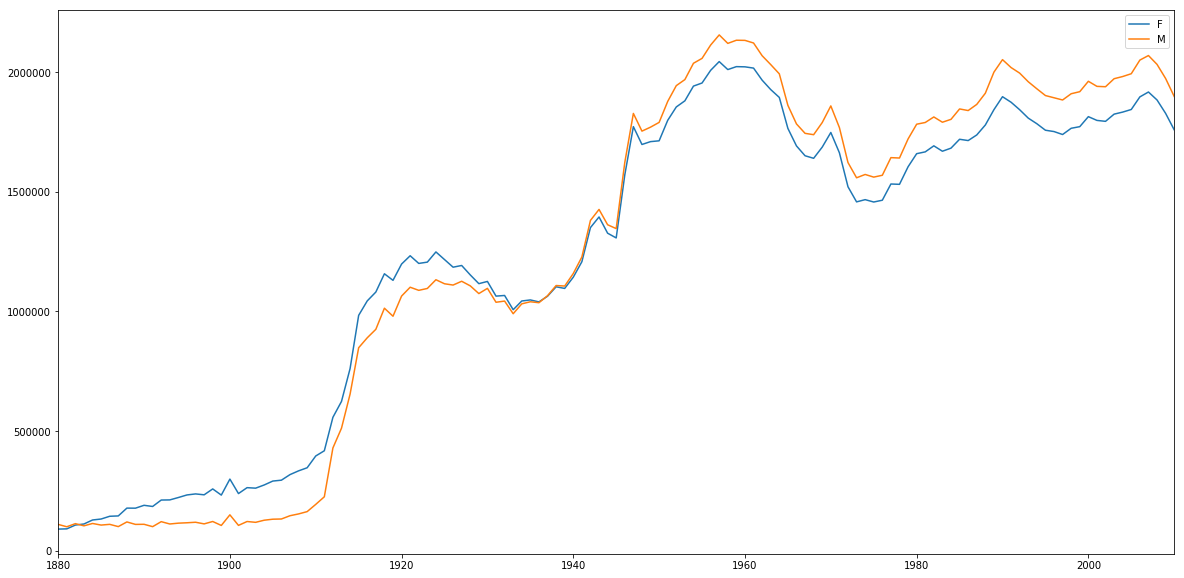

In [56]:
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
%matplotlib inline

birth_per_year = pd.DataFrame(
    [df.groupby('sex').sum().stack().values for df in dfs.values],
    index = years,
    columns = ['F', 'M']
)
birth_per_year.plot(figsize=(20, 10))

## Найдите самые популярные имена за всю историю 

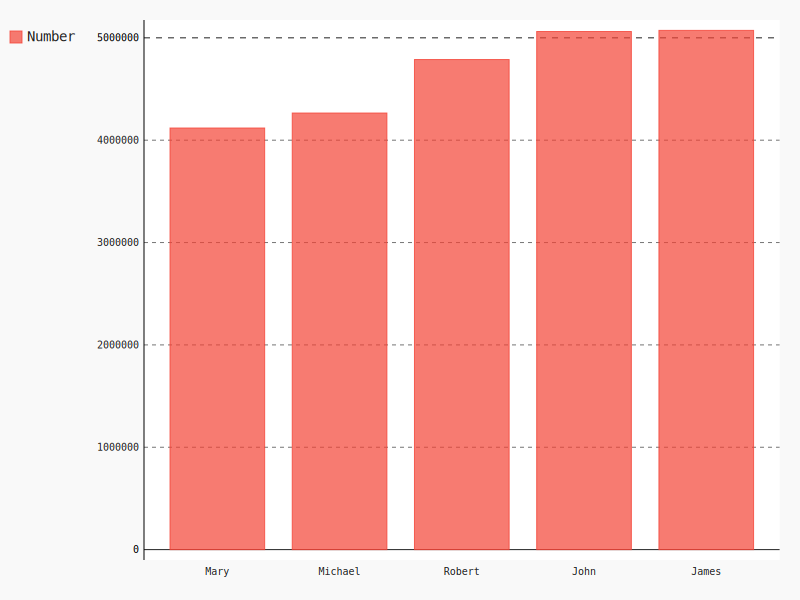

In [57]:
most_popular_names = pd.concat(dfs.values).groupby('name').sum().sort_values(['number']).tail()

import pygal
from IPython.display import display

bar_chart = pygal.Bar()
bar_chart.add('Number', most_popular_names['number'].values)
bar_chart.x_labels = map(str, most_popular_names.index)
display({'image/svg+xml': bar_chart.render()}, raw=True)

## Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени визуализируйте его динамику за все время 

In [184]:
# Находим самые популярные мужские и женские имена в десятилетиях
most_popular_names = []
start_year = years[0]
while start_year < years[-1]:
    slice = pd.concat(dfs.loc[start_year:start_year + 12].values).groupby(['name', 'sex']).sum().sort_values(['number'])
    slice = slice.reset_index()
    for sex_index in ['F', 'M']:
        name = slice['name'][slice['sex'][slice['sex'] == sex_index].index[-1]]
        item = (name, sex_index)
        if not item in most_popular_names:
            most_popular_names.append(item)
    start_year += 13
    

In [185]:
# Формирует дата фрэйм 
mpn_df = pd.DataFrame(
    # Фильтруем по каждому году, по популярному имени и берем только кол-во
    [df['number'][[(n[0], n[1]) in most_popular_names  for n in df[['name', 'sex']].values]].values for df in dfs],
    index = years,
    columns = most_popular_names
)

In [186]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

def offset_off(x):
    x.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

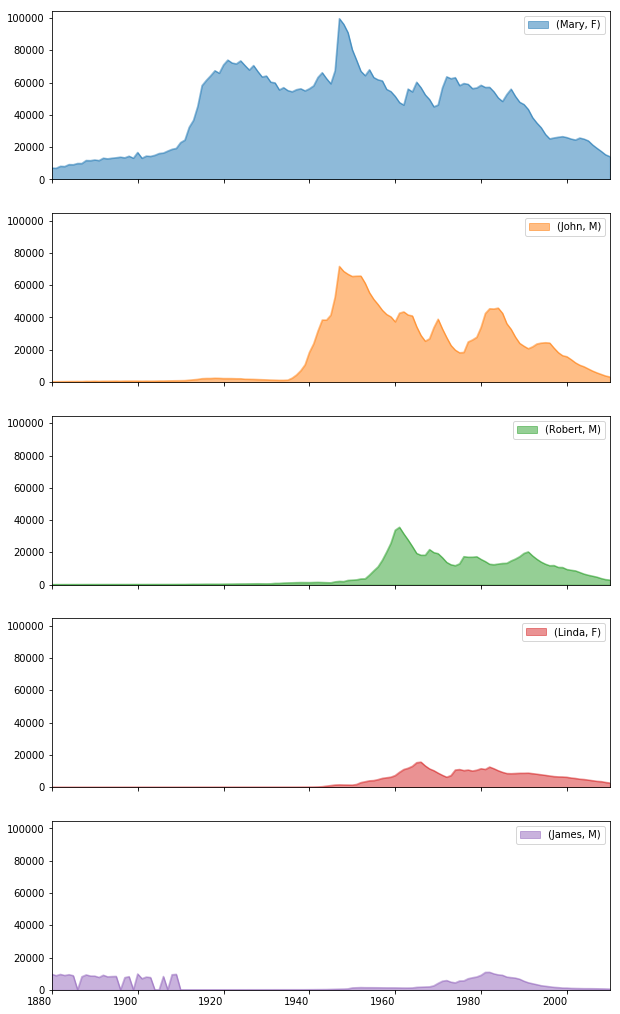

In [187]:
p = mpn_df[most_popular_names[:len(most_popular_names)/2]].plot.area(stacked=False, subplots=True, figsize=(10, 20), rot=0, sharey=True, legend=True)
offset_off(p[0])
#all_years = pd.concat(dfs.map())

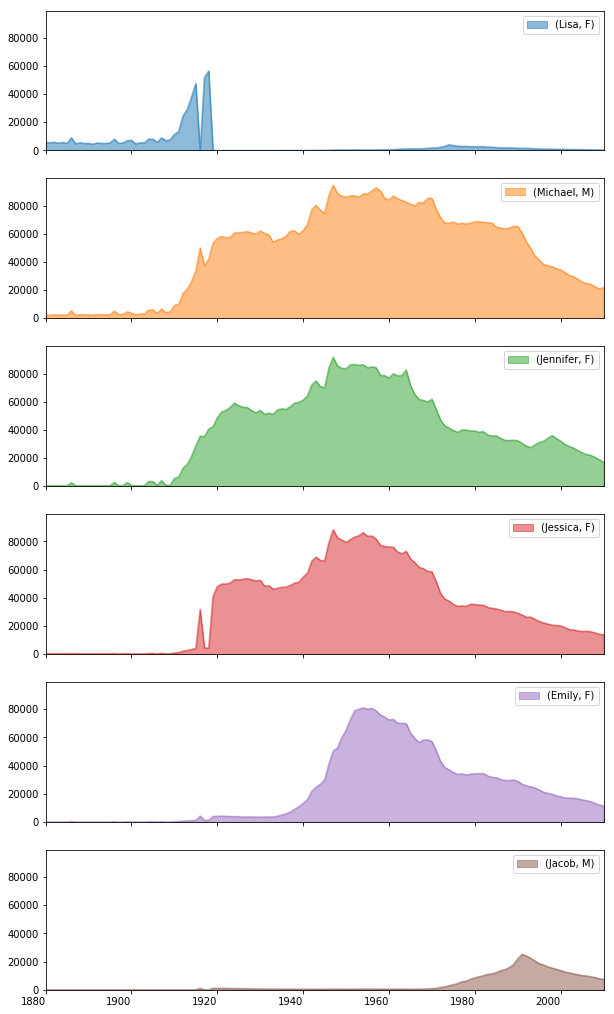

In [188]:
p = mpn_df[most_popular_names[len(most_popular_names)/2:]].plot.area(stacked=False, subplots=True, figsize=(10, 20), rot=0, sharey=True, legend=True)
offset_off(p[0])

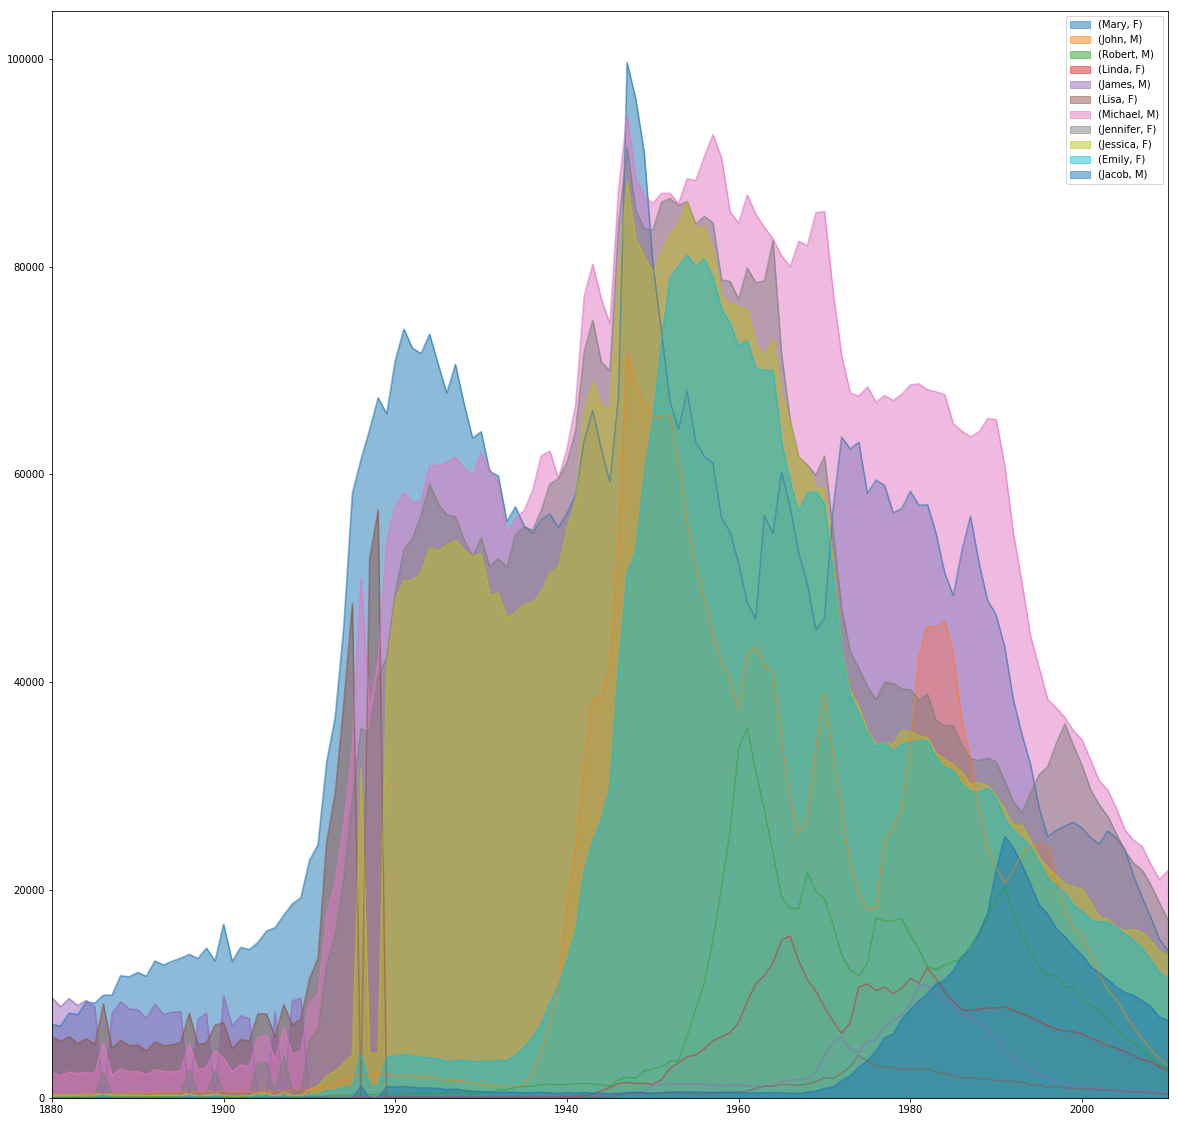

In [189]:
p = mpn_df.plot.area(stacked=False, figsize=(20, 20), legend=True)

## Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год) 

## Выберите 4 года из всего промежутка и отобразите для каждого года распределение по первой букве в имени, по последней букве в имени 

## Составьте список из нескольких известных людей (президенты, певцы, актеры, киногерои) и оцените их влияние на динамику имен, постройте наглядную визуализацию 

# Выбрать датасет и провести его анализ 

## Выбрать данные 

##  Составить список вопросов, по которым хотелось бы получить ответ в виде графиков (и расширять этот список вопросов в процессе выполнения задания) 

## Построить соответствующие визуализации 